In [1]:
import ast
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from datasets import load_dataset

#load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleanup data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#get only Data Analyst jobs in Thailand
df_DA_TH = df[(df['job_country'] == 'Thailand') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_TH = df_DA_TH.dropna(subset=['salary_year_avg'])
df_DA_TH_exploded = df_DA_TH.explode('job_skills')
df_DA_TH_exploded[['job_skills', 'salary_year_avg']].head()

,job_skills,salary_year_avg
48875,sql,98500.0
48875,sas,98500.0
48875,sas,98500.0
48875,r,98500.0
48875,python,98500.0


In [2]:
#calculate percent of job postings that have skills
df_DA_skills = df_DA_TH_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
df_DA_job_counts = len(df_DA_TH) #find count of Data Analyst jobs in TH with salary info
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / df_DA_job_counts * 100
df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,10,111175.0,76.923077
tableau,8,111175.0,61.538462
power bi,7,111175.0,53.846154
r,6,104837.5,46.153846
python,6,111175.0,46.153846
sql server,5,111175.0,38.461538
excel,5,111175.0,38.461538
sas,4,88850.0,30.769231
pandas,3,111175.0,23.076923


In [3]:
#filter for Data Analyst that meet a certain percentage
skill_limit = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit].head(15)
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,10,111175.0,76.923077
tableau,8,111175.0,61.538462
power bi,7,111175.0,53.846154
r,6,104837.5,46.153846
python,6,111175.0,46.153846
sql server,5,111175.0,38.461538
excel,5,111175.0,38.461538
sas,4,88850.0,30.769231
pandas,3,111175.0,23.076923


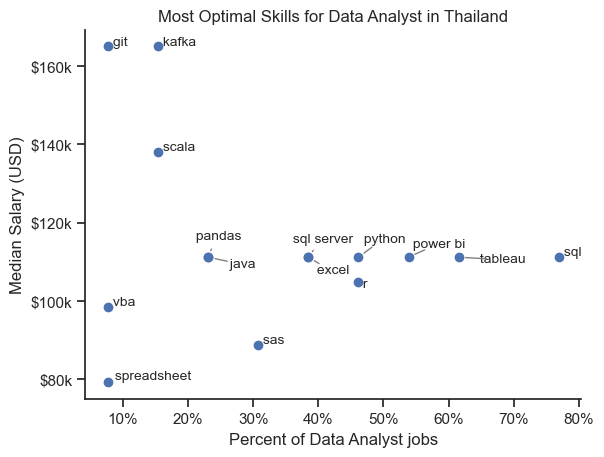

In [ ]:
#plot scatter plot
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst jobs')
plt.ylabel('Median Salary (USD)')
plt.title('Most Optimal Skills for Data Analysts in Thailand')

#get current axes, set limit, format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

#Add label to points
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt, fontsize=10))

#adjust text to avoid overlap and add arrow
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='-', color='gray', lw=1.0, shrinkA=10, shrinkB=5),
    expand_points=(4.0, 4.0),
    expand_text=(3.0, 3.0),
    force_points=1.0,
    force_text=1.0
)
sns.despine()
plt.show()

In [5]:
#add labels based on technology
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

#combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) #convert str to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists in technology_dict, add value to existing value
           technology_dict[key] += value
    else:                         # if key does not exist in technology_dict, add key and value
           technology_dict[key] = value

#remove duplicate by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'programming': ['perl', 'bash', 'python'],
 'analyst_tools': ['word',
  'powerpoint',
  'power bi',
  'sap',
  'excel',
  'splunk',
  'tableau',
  'alteryx',
  'looker'],
 'webframeworks': ['fastapi'],
 'libraries': ['graphql',
  'pytorch',
  'hadoop',
  'spring',
  'gdpr',
  'tensorflow',
  'airflow',
  'kafka',
  'spark',
  'react'],
 'sync': ['slack'],
 'other': ['terraform',
  'flow',
  'git',
  'gitlab',
  'atlassian',
  'kubernetes',
  'github',
  'ansible',
  'docker'],
 'cloud': ['bigquery',
  'snowflake',
  'aws',
  'redshift',
  'oracle',
  'gcp',
  'azure'],
 'databases': ['db2',
  'firestore',
  'cassandra',
  'neo4j',
  'dynamodb',
  'sqlite',
  'mysql',
  'mariadb',
  'couchbase',
  'firebase',
  'mongodb',
  'postgresql',
  'sql server',
  'redis',
  'elasticsearch'],
 'async': ['confluence', 'notion', 'trello', 'jira'],
 'os': ['unix', 'windows', 'linux']}

In [6]:
#turn dictionary to dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,programming,perl
0,programming,bash
0,programming,python
1,analyst_tools,word
1,analyst_tools,powerpoint
...,...,...
8,async,trello
8,async,jira
9,os,unix
9,os,windows


In [7]:
#merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,8,111175.0,61.538462,analyst_tools,tableau
1,7,111175.0,53.846154,analyst_tools,power bi
2,6,111175.0,46.153846,programming,python
3,5,111175.0,38.461538,databases,sql server
4,5,111175.0,38.461538,analyst_tools,excel
5,2,165000.0,15.384615,libraries,kafka
6,1,165000.0,7.692308,other,git
7,1,165000.0,7.692308,libraries,hadoop
8,1,165000.0,7.692308,cloud,snowflake
9,1,165000.0,7.692308,libraries,spark


In [8]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]
df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,8,111175.0,61.538462,analyst_tools,tableau
1,7,111175.0,53.846154,analyst_tools,power bi
2,6,111175.0,46.153846,programming,python
3,5,111175.0,38.461538,databases,sql server
4,5,111175.0,38.461538,analyst_tools,excel
5,2,165000.0,15.384615,libraries,kafka
6,1,165000.0,7.692308,other,git
7,1,165000.0,7.692308,libraries,hadoop
8,1,165000.0,7.692308,cloud,snowflake
9,1,165000.0,7.692308,libraries,spark


8 [0.79203559 0.09039591]
9 [-0.10793051  0.53259887]


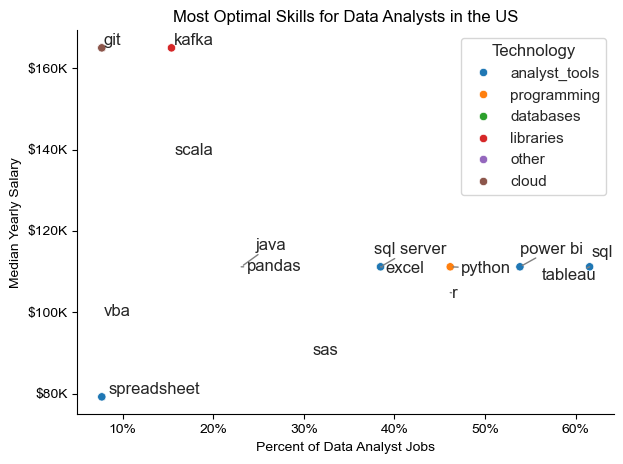

In [9]:
#plot
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

#adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='-', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout
plt.tight_layout()
plt.show()